In [108]:
import numpy as np
import pandas as pd
import math 
import plotly.graph_objects as go
import re
from scipy.signal import tf2ss


params = {
    'pi' :  np.pi ,
    'alpha' :  0.1 ,
    'alpha_gc' :  50 ,
    'a' :  3 ,
    'k' :  2 ,
    'H' :  81 ,
    'r0' :  1.5 ,
    'R' :  57.5 ,
    'area' :   math.pi * (57.5**2) ,
    'rho' :  1.225 ,
    'lambda_opt' :  7.6 ,
    'Cp_max' :  0.486 ,
    'Bt' :  0 ,
    'Kt' :  0 ,
    'Mt' :  0 ,
    'eta_dt' :  0.97 ,
    'eta_dt2' :  0.92 ,
    'eta_gc' :  0.98 ,
    'zeta' :  0.6 ,
    'zeta2' :  0.45 ,
    'zeta3' :  0.9 ,
    'omega_n' :  11.11 ,
    'omega_n2' :  5.73 ,
    'omega_n3' :  3.42 ,
    'Bdt' :  775.49 ,
    'Kdt' :  2.7*1e9 ,
    'Br' :  7.11 ,
    'Bg' :  45.6 ,
    'Ng' :  95 ,
    'Jr' :  55*1e6 ,
    'Jg' :  390*1e6 ,
    'K_opt' :  1.1271 ,
    'K_i' :  1 ,
    'K_p' :  4 ,
    'omega_nom' :  162 ,
    'omega_dt' :  15 ,
    'Pr' :  4.8*1e6 ,
}

In [ ]:
class Dynamics:
    def __init__(self, **params):
        self.pi = params['pi']
        self.alpha = params['alpha']
        self.alpha_gc = params['alpha_gc']
        self.a = params['a']
        self.k = params['k']
        self.H = params['H']
        self.r0 = params['r0']
        self.R = params['R']
        self.area = params['area']
        self.rho = params['rho']
        self.lambda_opt = params['lambda_opt']
        self.Cp_max = params['Cp_max']
        self.Bt = params['Bt']
        self.Kt = params['Kt']
        self.Mt = params['Mt']
        self.eta_dt = params['eta_dt']
        self.eta_dt2 = params['eta_dt2']
        self.eta_gc = params['eta_gc']
        self.zeta = params['zeta']
        self.zeta2 = params['zeta2']
        self.zeta3 = params['zeta3']
        self.omega_n = params['omega_n']
        self.omega_n2 = params['omega_n2']
        self.omega_n3 = params['omega_n3']
        self.Bdt = params['Bdt']
        self.Kdt = params['Kdt']
        self.Br = params['Br']
        self.Bg = params['Bg']
        self.Ng = params['Ng']
        self.Jr = params['Jr']
        self.Jg = params['Jg']
        self.K_opt = params['K_opt']
        self.K_i = params['K_i']
        self.K_p = params['K_p']
        self.omega_nom = params['omega_nom']
        self.omega_dt = params['omega_dt']
        self.Pr = params['Pr']

    def get_cp(self, lamb, angle):
    
        path = r'TSRxCPxPSI.csv'
        df = pd.read_csv(path)
        angle_cols = [(c) for c in df.columns if c != 'TSR']
        angles_available = np.array([float(c) for c in df.columns if c != 'TSR'])
        angle = float(angle)
        idx_ang = np.abs(angles_available - angle).argmin()
        nearest_angle = angles_available[idx_ang]
        nearest_angle_col = angle_cols[idx_ang]
        lambdas = df['TSR'].values.astype(float)
        lamb = float(lamb)
        idx_lamb = np.abs(lambdas - lamb).argmin()
        nearest_lambda = lambdas[idx_lamb]
        cp_value = df.loc[df['TSR'] == nearest_lambda, nearest_angle_col].iloc[0]
        return cp_value

    
    def AeroDynamics(self, v_wind, beta, omega_r):
        
        pi, rho, R = self.pi, self.rho, self.R
        lamb = omega_r*R/v_wind
        Cq = self.get_cp(lamb,beta)
        tau_r = rho*pi*(R**3)*Cq*(v_wind*2)/2
        return tau_r
    
    def PitchSystem(self,beta_r):
        omega_n, zeta = self.omega_n, self.zeta
        num = [omega_n**2]
        den = [1, 2*zeta*omega_n, omega_n**2]

        Apb, Bpb, Cpb, Dpb = tf2ss(num, den)
        return

    def dynamics(self, t, X, U):
        

        rho = self.rho
        pi = self.pi
        R = self.R
        Bdt = self.Bdt 
        Kdt = self.Kdt 
        Jr = self.Jr 
        Jg = self.Jg 
        Bg = self.Bg
        Ng = self.Ng
        eta_dt = self.eta_dt
        Kt = self.Kt
        Mt = self.Mt
        zeta = self.zeta
        omega_n = self.omega_n



In [116]:
mdl = Dynamics(**params)
mdl.PitchSystem()

11.11 0.6


In [3]:
path = r'TSRxCPxPSI.csv'
df = pd.read_csv(path)
X = df.iloc[:, 0].values
Y = np.arange(len(df.columns)-1)
X, Y = np.meshgrid(X, Y)

Z = np.array(df.iloc[:, 1:]).T

# Create the plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='magma')])

# Customize layout
fig.update_layout(
    scene = {
        'xaxis_title': 'X Axis',
        'yaxis_title': 'Y Axis',
        'zaxis_title': 'Z Axis',
        #'zaxis': dict(range=[-2.01, 0.5])
    },
    coloraxis_colorbar=dict(
        title="Color Scale"
    ),
)

# Show the plot
fig.show()


In [120]:
print(Apb,'\n', Bpb,'\n', Cpb,'\n', Dpb)

[[ -14. -100.]
 [   1.    0.]] 
 [[1.]
 [0.]] 
 [[  0. 100.]] 
 [[0.]]


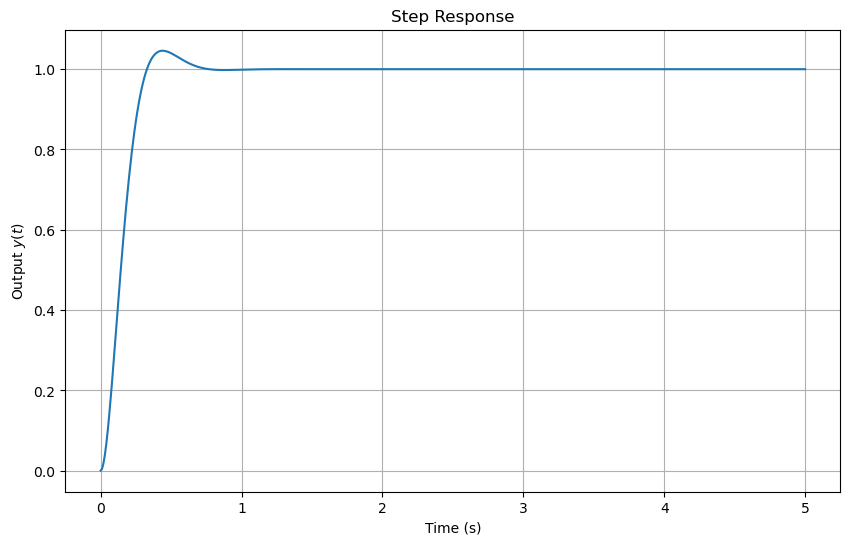

In [117]:
# Import the new functions we'll need
from scipy.signal import StateSpace, step, lsim
import matplotlib.pyplot as plt

# --- Your existing code ---
import numpy as np
from scipy.signal import tf2ss

omega_n = 10.0
xi = 0.7
num = [omega_n**2]
den = [1, 2*xi*omega_n, omega_n**2]
Apb, Bpb, Cpb, Dpb = tf2ss(num, den)

# --- New part ---
# 1. Create a StateSpace system object
sys = StateSpace(Apb, Bpb, Cpb, Dpb)

# 2. Define a time vector for the simulation
#    (e.g., from 0 to 5 seconds, with 500 points)
t = np.linspace(0, 5, 500)

# 3. Simulate the step response
t_out, y_out = step(sys, T=t)

# 4. Plot the output
plt.figure(figsize=(10, 6))
plt.plot(t_out, y_out)
plt.title('Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Output $y(t)$')
plt.grid(True)
plt.show()